In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics 


data = pd.read_csv("wine/winequality-red.csv", sep=";")
names = data.columns

data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
correlation = data.corr()
correlation['quality'].sort_values()

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

In [3]:
plt.figure(figsize=(12, 5))
sns.heatmap(correlation, annot=True)

NameError: name 'correlation' is not defined

In [52]:
# Model
class LR:
    def __init__(self, num_iter=5000, learn_rate=0.5):
        self.num = num_iter
        self.lr = learn_rate

        self.length = 0
        self.size = 0
        self.weights = None
        self.bias = 0 
        self.costs = []

    # Section B: Sigmoid Function
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    # Section C: Forward Propogation
    def forward_propogation(self, X, y):
        Z = np.dot(self.weights, X.T) + self.bias
        A = self.sigmoid(Z) 

        cost = (-1 / self.length) * np.sum(y * np.log(A) + (1 - y) * (np.log(1 - A)))

        return A, cost

    # Section C: Backward Propogation
    def backward_propogation(self, X, y, A): 
        dw = (1 / self.length) * np.dot((A - y), X)
        db = (1 / self.length) * np.sum(A - y)

        return dw, db

    # Section D: Updating Parameters Function 
    def fit(self, X, y): 
        self.length = X.shape[0]
        self.size = X.shape[1]
        self.weights = np.zeros(shape=(1, self.size))

        for i in range(self.num): 
            A, cost = self.forward_propogation(X, y)
            dw, db = self.backward_propogation(X, y, A)

            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db

            if i % 100 == 0:
                self.costs.append(cost)

    # Predict
    def predict(self, X): 
        y = np.zeros((1, X.shape[0]))

        z = np.dot(self.weights, X.T) + self.bias
        A = self.sigmoid(z)

        for i in range(A.shape[1]):
            if A[0, i] > 0.5:
                y[0, i] = 1
            else: 
                y[0, i] = 0

        return y[0]

    def accuracy(self, y_actual, y_pred): 
        return (100 - np.mean(np.abs(y_pred - y_actual)) * 100)

In [4]:
def score(actual, estimate):
    return np.square(np.subtract(actual, estimate)).mean()

In [5]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [6]:
lr_model = LR()
lr_model.fit(x_train, y_train)
lr_pred = lr_model.predict(x_test)
print("The accuracy is:"+str(metrics.accuracy_score(y_test, lr_pred)*100)+'%')

NameError: name 'LR' is not defined

In [62]:
from sklearn.linear_model import LogisticRegression

sklr_model = LogisticRegression()
sklr_model.fit(x_train, y_train)
sklr_predict = sklr_model.predict(x_test)
print("The accuracy is:"+str(metrics.accuracy_score(y_test, sklr_predict)*100)+'%')

The accuracy is:58.4375%


In [63]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear') 
svm_model.fit(x_train, y_train)
svm_pred = svm_model.predict(x_test)
print("The accuracy is:"+str(metrics.accuracy_score(y_test, svm_pred)*100)+'%')

The accuracy is:59.68750000000001%


$y = wx+b $

$w = \sum a_i y_i x_i$
$w = (4*1*0.414) + (2.5*1*0.018) + (3.5*4*0.018) + (2*2.1*0.414)$
$w = 0.846$

$y = 0.846x + b $
$2.9 = 0.846(4) + b_1 $
$b_1 = 6.284$

$2.1 = 0.846(2) + b_2$
$b_2 = 3.792$

$b = (b_2 - b_1)/2 + b_2 = 5.038$

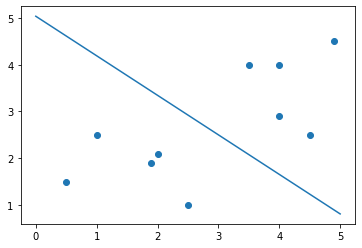

In [12]:
x1 = [4, 4, 1, 2.5, 4.9, 1.9, 3.5, 0.5, 2, 4.5]
x2 = [2.9, 4, 2.5, 1, 4.5, 1.9, 4, 1.5, 2.1, 2.5]
y = [1, 1, -1, -1, 1, -1, 1, -1, -1, 1]
a = [0.414, 0, 0, 0.018, 0, 0, 0.018, 0, 0.414, 0]

x_svm = np.linspace(0, 5, 10)
y_svm = - 0.846*x_svm + 5.038

plt.scatter(x1, x2)
plt.plot(x_svm, y_svm)
plt.show()

In [15]:
d = abs(0.846*1.9+1.9-5.038)/np.sqrt(0.846**2 + 1**2)
print("{} is the distance of x6 from the hyperplane".format(d))

1.1685276906175226 is the distance of x6 from the hyperplane


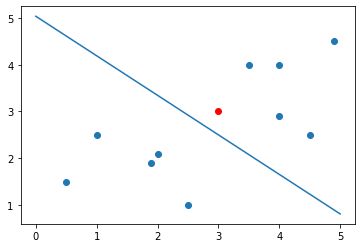

In [18]:
plt.scatter(x1, x2)
plt.scatter([3],[3], color="r")
plt.plot(x_svm, y_svm)
plt.show()

According to the classifier. Point z, [3,3] is classified to be 1. 

In [66]:
def kernel(a, b, param):   ## Define the kernel function, this is same as RBF above. 
    sqdist = np.sum(a**2,1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
    return np.exp(-.5 * (1/param) * sqdist)

In [87]:
n = 50 
xtest = np.linspace(0, 10, n).reshape(-1, 1)

param_1 = 0.09
param_2 = 0.05
param_3 = 0.01
param_4 = 0.001

K_ss_1 = kernel(xtest, xtest, param_1)
K_ss_2 = kernel(xtest, xtest, param_2)
K_ss_3 = kernel(xtest, xtest, param_3)
K_ss_4 = kernel(xtest, xtest, param_4)

L1 = np.linalg.cholesky(K_ss_1 + 1e-15*np.eye(n))
L2 = np.linalg.cholesky(K_ss_2 + 1e-15*np.eye(n))
L3 = np.linalg.cholesky(K_ss_3 + 1e-15*np.eye(n))
L4 = np.linalg.cholesky(K_ss_4 + 1e-15*np.eye(n))

f_prior_1 = np.dot(L1, np.random.normal(size=(n,3)))
f_prior_2 = np.dot(L2, np.random.normal(size=(n,3))) 
f_prior_3 = np.dot(L3, np.random.normal(size=(n,3))) 
f_prior_4 = np.dot(L4, np.random.normal(size=(n,3))) 

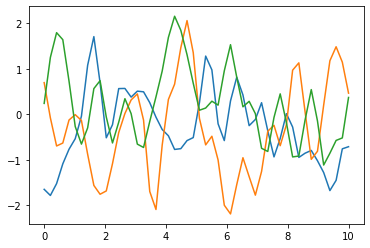

In [88]:
plt.plot(xtest, f_prior_1)
plt.show()

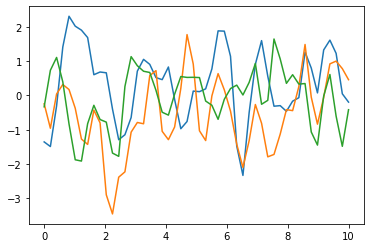

In [89]:
plt.plot(xtest, f_prior_2)
plt.show()

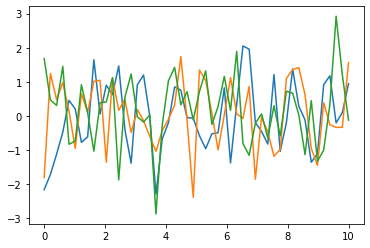

In [90]:
plt.plot(xtest, f_prior_3)
plt.show()

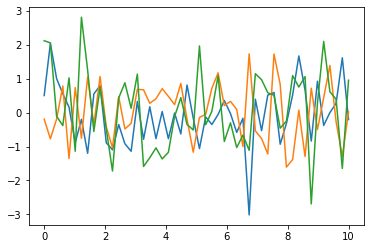

In [78]:
plt.plot(Xtest, f_prior_4)
plt.show()

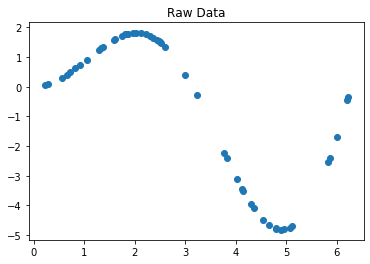

In [95]:
xtrain = np.random.uniform(low=0, high=2*np.pi, size=50).reshape(50,1)
ytrain = xtrain * np.sin(xtrain)

plt.scatter(xtrain, ytrain)
plt.title("Raw Data")
plt.show()

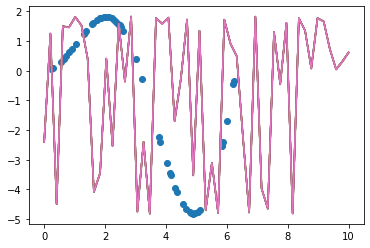

In [108]:
param = 0.1

k = kernel(xtrain, xtrain, param)
L = np.linalg.cholesky(k + 0.00005*np.eye(len(xtrain)))

k_s = kernel(xtrain, xtrain, param) 
lk = np.linalg.solve(L, k_s)
mu = np.dot(lk.T, np.linalg.solve(L, ytrain)).reshape((n,))

s2 = np.diag(k_s) - np.sum(lk**2, axis=0)
stdv = np.sqrt(s2)

l =  np.linalg.cholesky(k_s + 1e-6*np.eye(n) - np.dot(lk.T, lk))
f_post = mu.reshape(-1, 1) + np.dot(l, np.random.normal(size=(n,7)))

plt.scatter(xtrain, ytrain)
plt.plot(xtest, f_post)
plt.gca().fill_between(Xtest.flat, mu-2*stdv, mu+2*stdv, color="#dddddd")
plt.show()
